# 120-years-of-olympic-trends

**This is a Dataset obtained from Kaggle, which contains last 120 Year Olympics Data.
Here in this Analysis of Data I derived Some of the information About Players and their Countries, Age, Genders, Medals they won and lot more...This extensive dataset provides a treasure trove of insights and trends, allowing researchers and sports enthusiasts alike to gain a deeper understanding of the evolution of the Olympics and the performances of athletes from various nations across the globe.**

## Downloading the Dataset

The primary objectives of this data analysis are as follows:
Historical Trends, Age and Gender Analysis, Country-wise Performance, Sports Dominance, Medal Analysis of each player or each Team

In [1]:
!pip install jovian opendatasets --upgrade --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.5 MB/s eta 0:00:00


Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/mysarahmadbhat/120-years-of-olympic-history'

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Bindu Satya Amarnadh
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mysarahmadbhat/120-years-of-olympic-history


100%|██████████| 5.43M/5.43M [00:00<00:00, 35.5MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './120-years-of-olympic-history'

In [5]:
import os
os.listdir(data_dir)

['country_definitions.csv',
 'athlete_events_data_dictionary.csv',
 'country_definitions_data_dictionary.csv',
 'athlete_events.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "120-years-of-olympic-history"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Data Preparation and Cleaning

*They involve transforming raw data into a clean, structured format that can be readily used for analysis.*
This involve  

    - Data Collection
    - Data Integraion
    - Data Cleaning
    - Handling Missing Data
    - Data Transformation
    - Feature Engineering (One Hot Encoding)

*It is an iterative process that may involve going back and forth between various steps to ensure the data is ready for meaningful analysis.*



In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv(data_dir + '/athlete_events.csv')
dfregions = pd.read_csv(data_dir+'/country_definitions.csv')

In [12]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**Considering Summer Season only**

In [13]:
df = df[df.Season == 'Summer']

In [14]:
print(df.shape)
print(dfregions.shape)

(222552, 15)
(230, 3)


In [15]:
df = pd.merge(df, dfregions, on='NOC', how='left')

In [16]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


Dropping Duplicate rows

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df.describe()

,ID,Age,Height,Weight,Year
count,221167.000000,212137.000000,170667.000000,168661.000000,221167.000000
mean,68016.867403,25.549367,175.515560,70.688298,1976.602486
std,39144.711847,6.434035,10.914843,14.805242,30.820855
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34011.500000,21.000000,168.000000,60.000000,1960.000000
50%,68342.000000,24.000000,175.000000,70.000000,1984.000000
75%,101904.500000,28.000000,183.000000,79.000000,2000.000000
max,135568.000000,97.000000,226.000000,214.000000,2016.000000


In [19]:
df.dtypes

,0
ID,int64
Name,object
Sex,object
Age,float64
Height,float64
Weight,float64
Team,object
NOC,object
Games,object
Year,int64


---

In [20]:
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9030
Height,50500
Weight,52506
Team,0
NOC,0
Games,0
Year,0


In [21]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [22]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis = 1)

In [23]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values(['Gold','Silver','Bronze'],ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,VIN,0,0,0
226,VNM,0,0,0
227,YAR,0,0,0
228,YEM,0,0,0


In [24]:
df['Total'] = df['Bronze'] + df['Gold'] + df['Silver']

The above values are wrong, since from the dataset information, we are considering each player's medal as a separate medal, but ideally it should collectively one medal for a whole team... so we are making a another dataset where it drops the duplicate rows which contains the same value in columns 'Games','NOC','Team','Year','Medal','Event' to get correct values for the number of medals a country earned.

In [26]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver,Total
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False,True
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,...,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False,False


In [27]:
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Year', 'Sport', 'Medal', 'Event', 'Games'])
medal_tally = medal_tally.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
medal_tally['Gold'] = medal_tally['Gold'].astype(int)
medal_tally['Silver'] = medal_tally['Silver'].astype(int)
medal_tally['Bronze'] = medal_tally['Bronze'].astype(int)

In [28]:
medal_tally.head()

,NOC,Gold,Silver,Bronze
0,USA,1035,802,708
1,URS,394,317,294
2,GBR,278,317,300
3,GER,235,261,283
4,FRA,234,256,287


In [29]:
medal_tally[medal_tally['NOC'] == 'IND']

,NOC,Gold,Silver,Bronze
53,IND,9,7,12


So, India is in 53 position and it got
    Gold - 9 Medals,
    Silver - 7 Medals,
    Bronze - 12 Medals

## Exploratory Analysis and Visualization

**In this exploratory analysis and visualization of the last 120 years of Olympics data, we aim to uncover trends and insights from various angles. These visualizations will provide a comprehensive understanding of Olympic history, including gender representation, athlete ages, sports dominance, and medal performances of different countries.**


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [30]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##### Heatmap of Number of Events per Sport Over Time


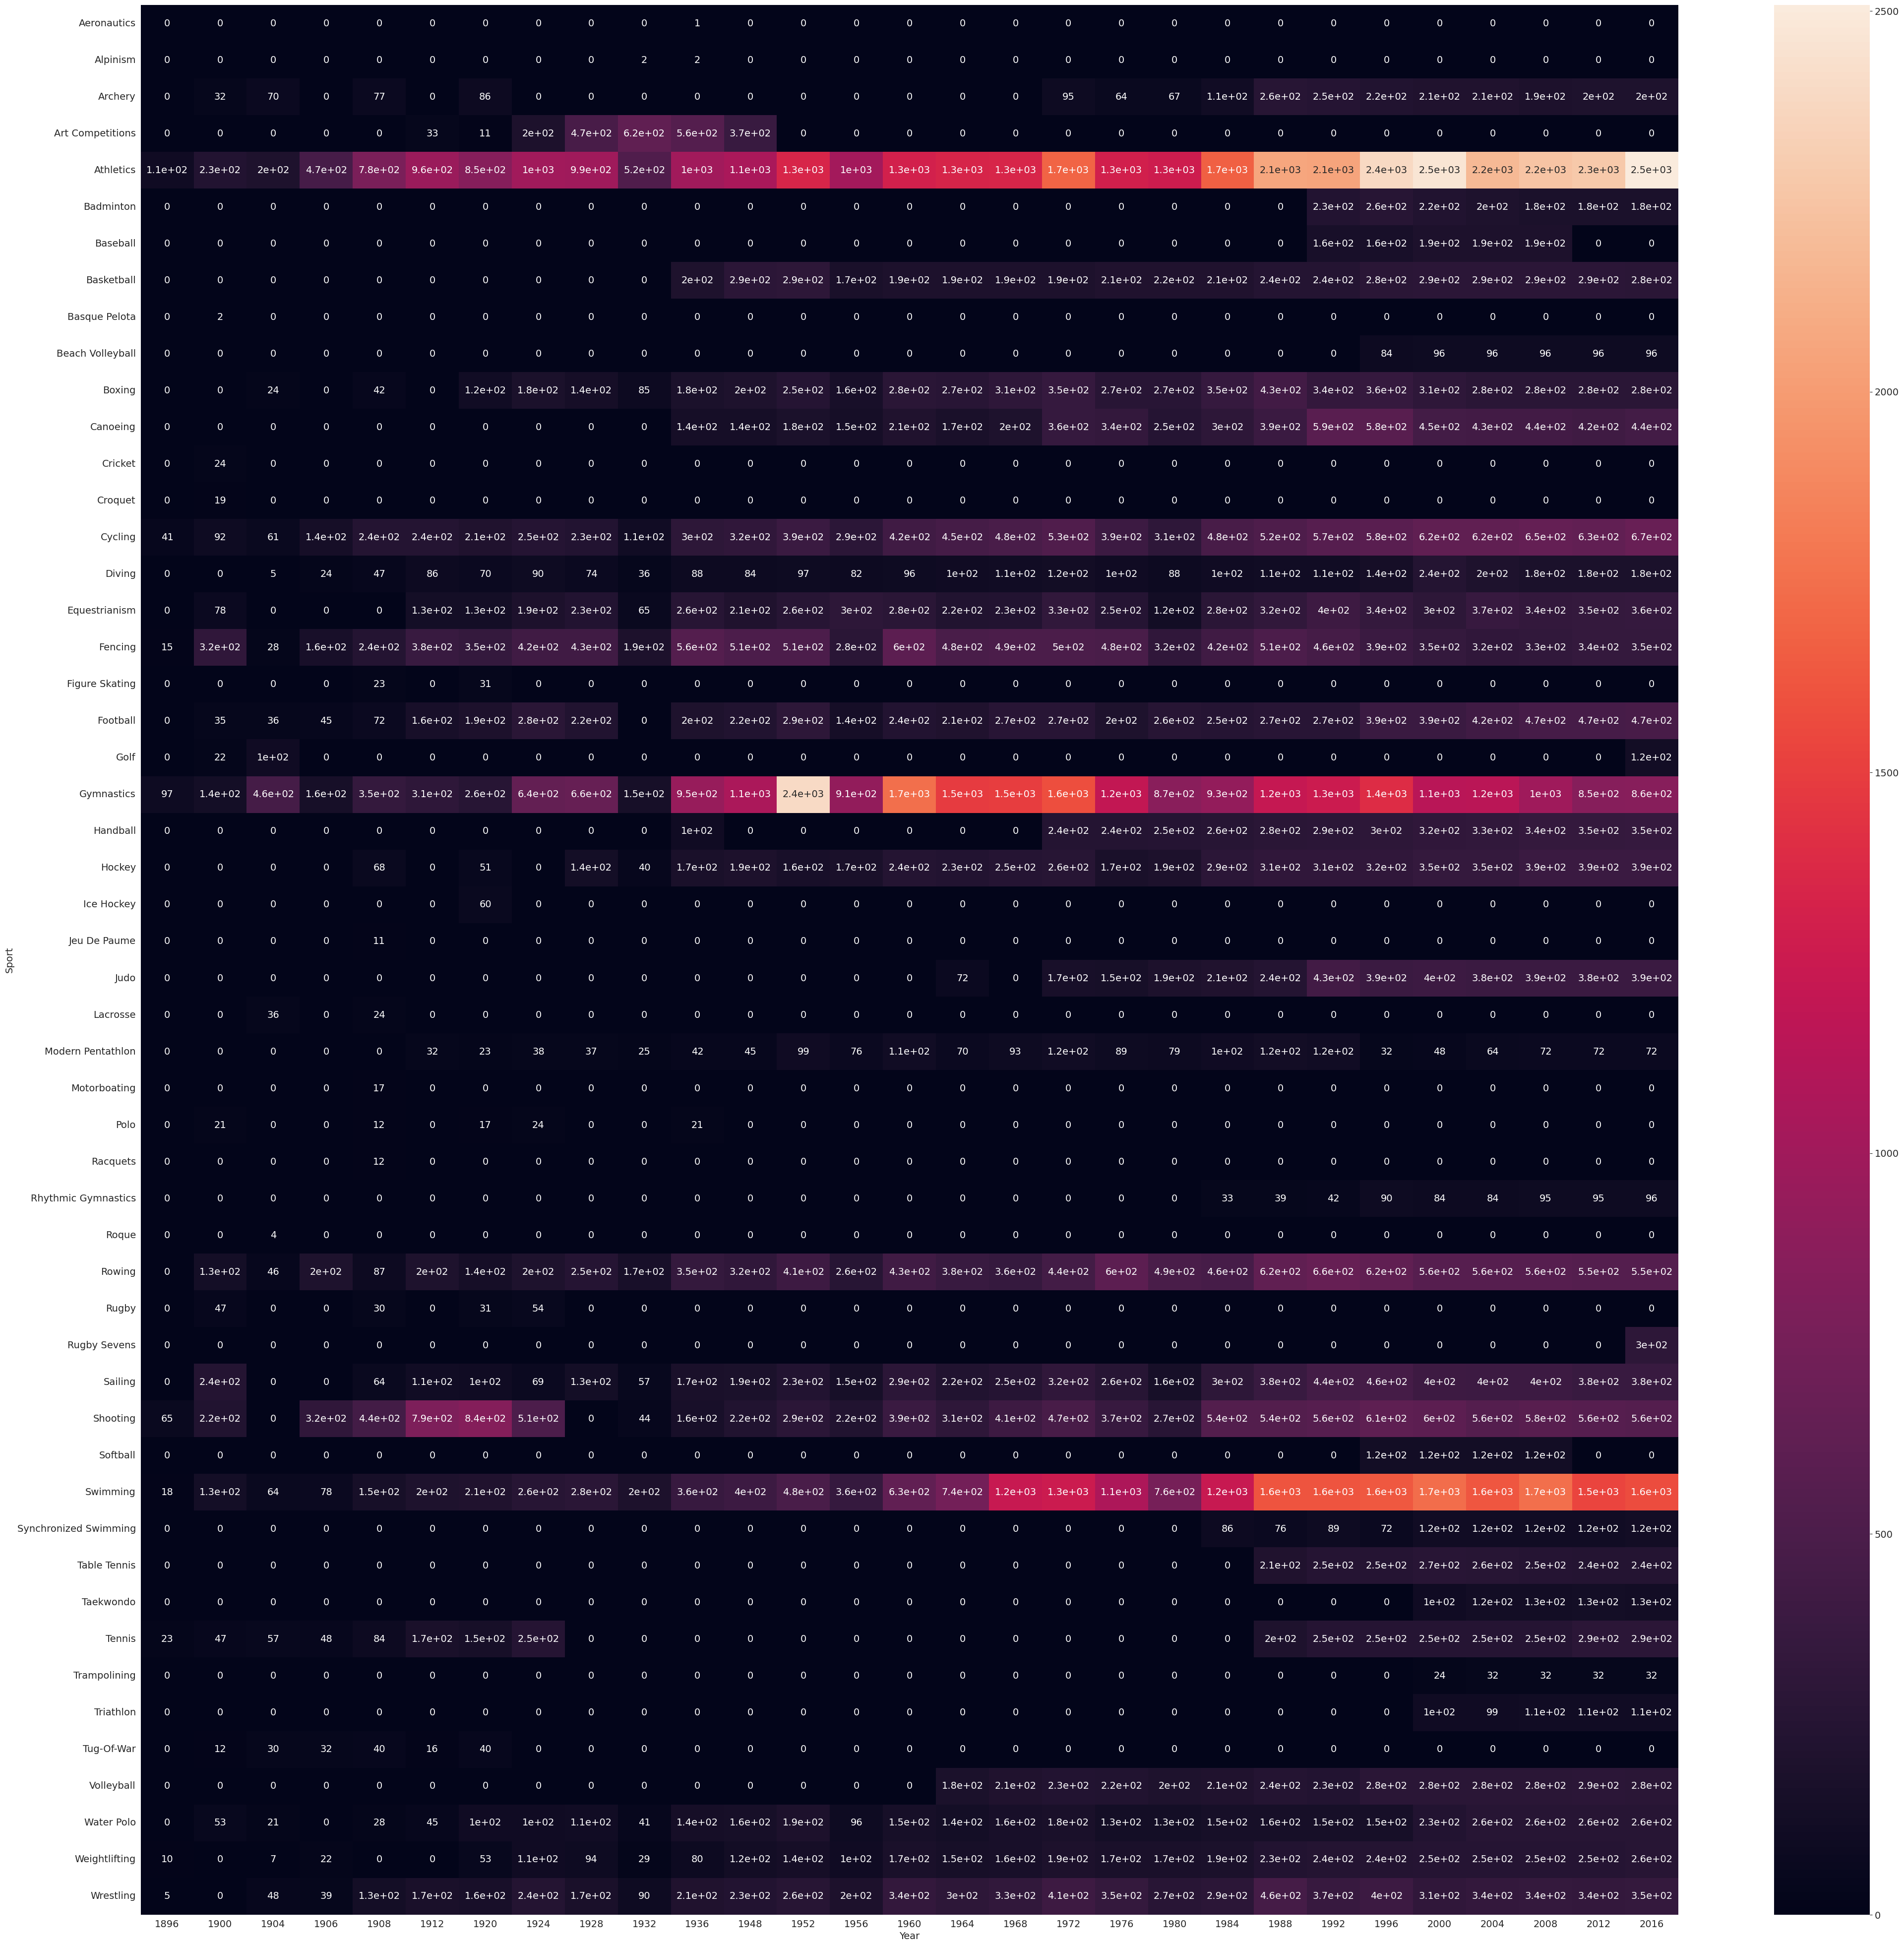

In [31]:
plt.figure(figsize=(50,50))
sns.heatmap(df.pivot_table(index = 'Sport',columns = 'Year',values = 'Event',aggfunc = 'count').fillna(0).astype(int),annot = True)
plt.show()

**This visualization provides a clear overview of how the number of events in each sport has evolved throughout Olympic history. It helps identify sports with increasing or decreasing participation and highlights the overall growth of the Games.**

##### Bar Plot of Top 10 Most Successful Countries

<ipython-input-32-f64a44722a33>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='Total', data=top_countries, palette='viridis')


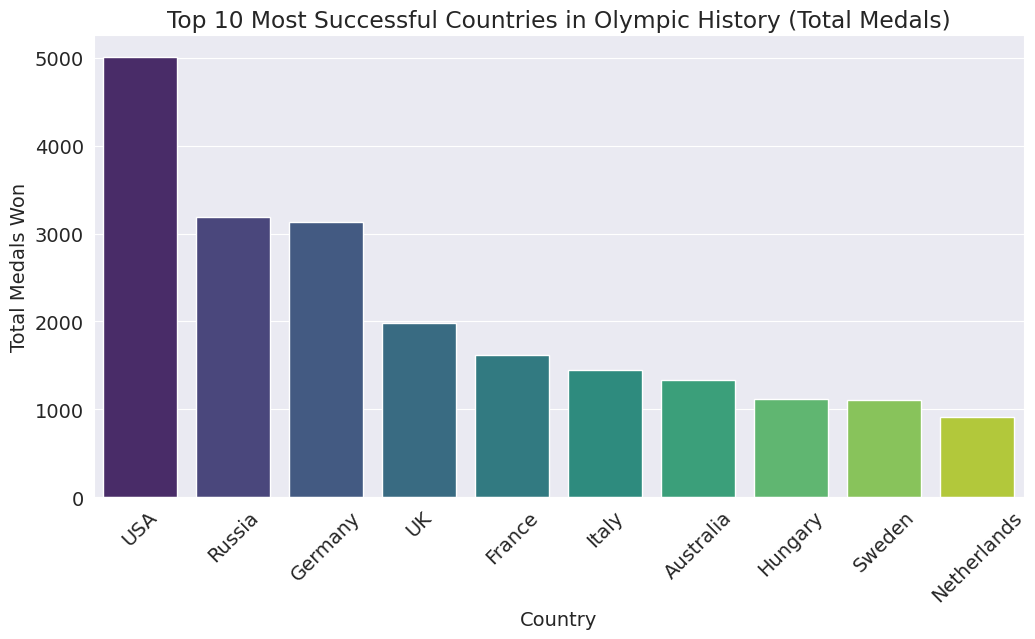

In [32]:
top_countries = df.groupby('region')['Total'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='Total', data=top_countries, palette='viridis')
plt.title('Top 10 Most Successful Countries in Olympic History (Total Medals)')
plt.xlabel('Country')
plt.ylabel('Total Medals Won')
plt.xticks(rotation=45)
plt.show()

**This visualization instantly highlights the countries that have historically dominated the Olympics in terms of total medals won. It provides a clear picture of global sporting powerhouses.**

##### Line Plot of Average Age of Medal-Winning Athletes Over Time (for Selected Sports)

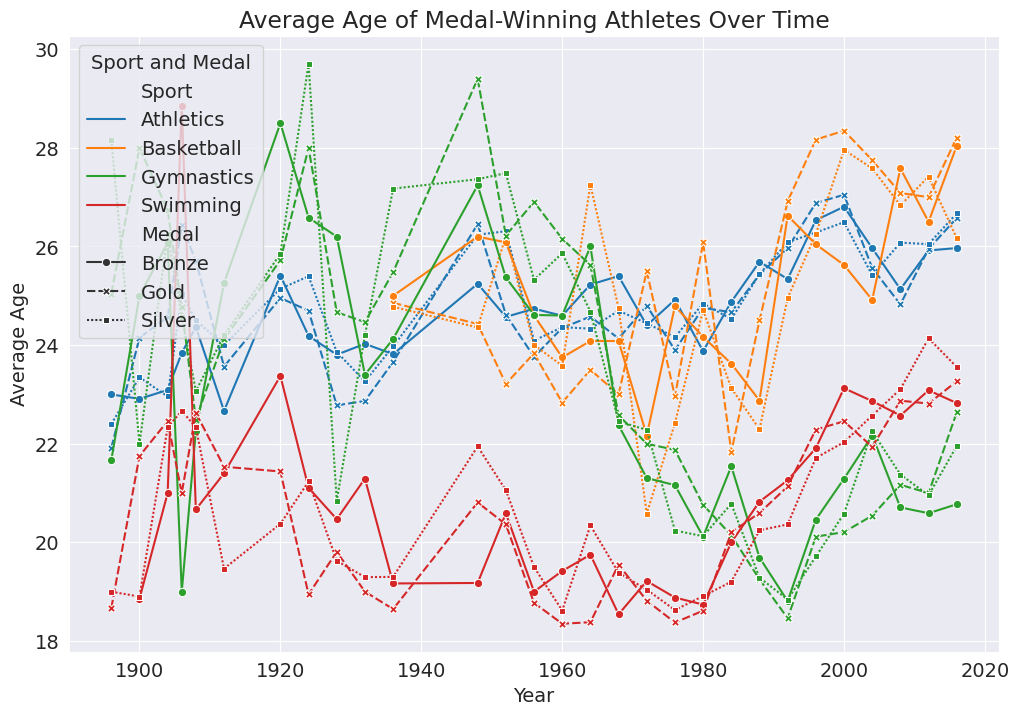

In [33]:
age_trend = df.groupby(['Sport', 'Year', 'Medal'])['Age'].mean().reset_index()
selected_sports = ['Athletics', 'Swimming', 'Gymnastics', 'Basketball']
filtered_age_trend = age_trend[age_trend['Sport'].isin(selected_sports)]
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Age', hue='Sport', style='Medal', data=filtered_age_trend, markers=True)
plt.title('Average Age of Medal-Winning Athletes Over Time')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.legend(title='Sport and Medal')
plt.show()

##### Heat Map of Number of Events Per Sport

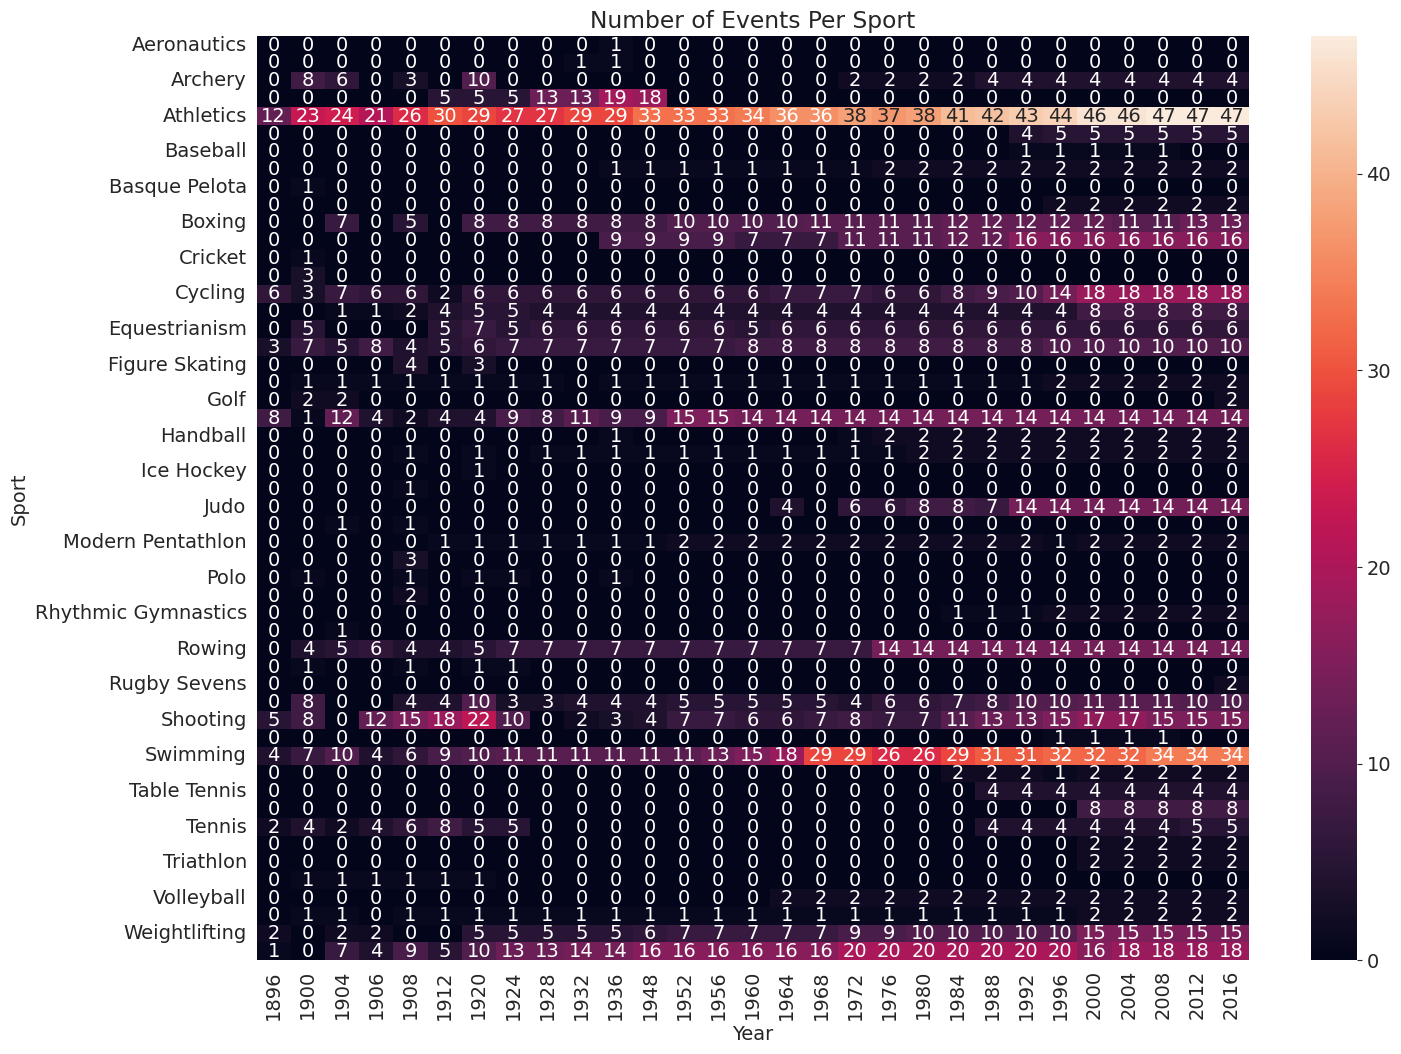

In [34]:
df2 = df.drop_duplicates(['Year', 'Sport', 'Event'])
plt.figure(figsize=(16, 12))
sns.heatmap(df2.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype(int), annot=True)
plt.title('Number of Events Per Sport')
plt.show()

##### Line Graph of Number of Athletes Participated Over Time


In [35]:
import plotly.graph_objects as go
from itertools import cycle

athelets_over_time = df.groupby(['Year', 'Team'])['Name'].count().reset_index().sort_values('Year')
countries = athelets_over_time['Team'].unique()
colors = cycle(['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)',
                'rgb(214, 39, 40)', 'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 'rgb(188, 189, 34)',
                'rgb(23, 190, 207)'])
traces = []

for i, country in enumerate(countries):
    country_data = athelets_over_time[athelets_over_time['Team'] == country]
    trace = go.Scatter(x=country_data['Year'], y=country_data['Name'],
                       mode='lines+markers', name=country, line=dict(color=next(colors)))
    traces.append(trace)

layout = go.Layout(title='Number of Athletes Over Time', xaxis=dict(title='Year'), yaxis=dict(title='Number of Athletes'))
fig = go.Figure(data=traces, layout=layout)
fig.show()

##### Line Plot of No of Medals India Won each Year

<ipython-input-36-45aa0a917f5d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



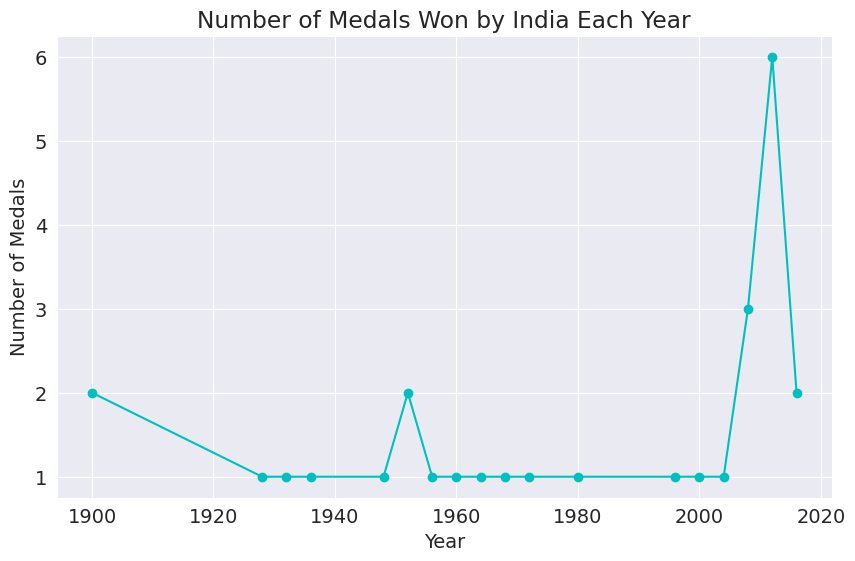

In [36]:
temp = df.dropna(subset=['Medal'])
temp.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'Sport', 'Event', 'Medal'], inplace=True)
IndiaMedals = temp.loc[temp['region'] == 'India'].groupby(['Year'])['Medal'].count().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(IndiaMedals['Year'], IndiaMedals['Medal'], marker='o', linestyle='-', color='c')
plt.title('Number of Medals Won by India Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()

##### Heat Map of No of Medals 'INDIA' won since it Started joining in Olympics (per each Year)

In [37]:
temp[temp.region=='India']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver,Total
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,...,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False,True
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,...,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False,True
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,...,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False,True
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,...,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False,True
7056,4518,"Joseph Anthony ""Joe"" Antic",M,29.0,168.0,59.0,India,IND,1960 Summer,1960,...,Roma,Hockey,Hockey Men's Hockey,Silver,India,NaN,False,False,True,True
17790,11197,Vasudevan Bhaskaran,M,29.0,174.0,68.0,India,IND,1980 Summer,1980,...,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False,True
18286,11520,Govinda Billimogaputtaswamy,M,20.0,171.0,60.0,India,IND,1972 Summer,1972,...,Munich,Hockey,Hockey Men's Hockey,Bronze,India,NaN,True,False,False,True
18444,11601,Abhinav Bindra,M,25.0,173.0,70.0,India,IND,2008 Summer,2008,...,Beijing,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,India,NaN,False,True,False,True
34630,21339,Rajendra Absolem Christy,M,30.0,165.0,58.0,India,IND,1968 Summer,1968,...,Mexico City,Hockey,Hockey Men's Hockey,Bronze,India,NaN,True,False,False,True
35545,21912,Leslie Walter Claudius,M,21.0,162.0,53.0,India,IND,1948 Summer,1948,...,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,False,True,False,True


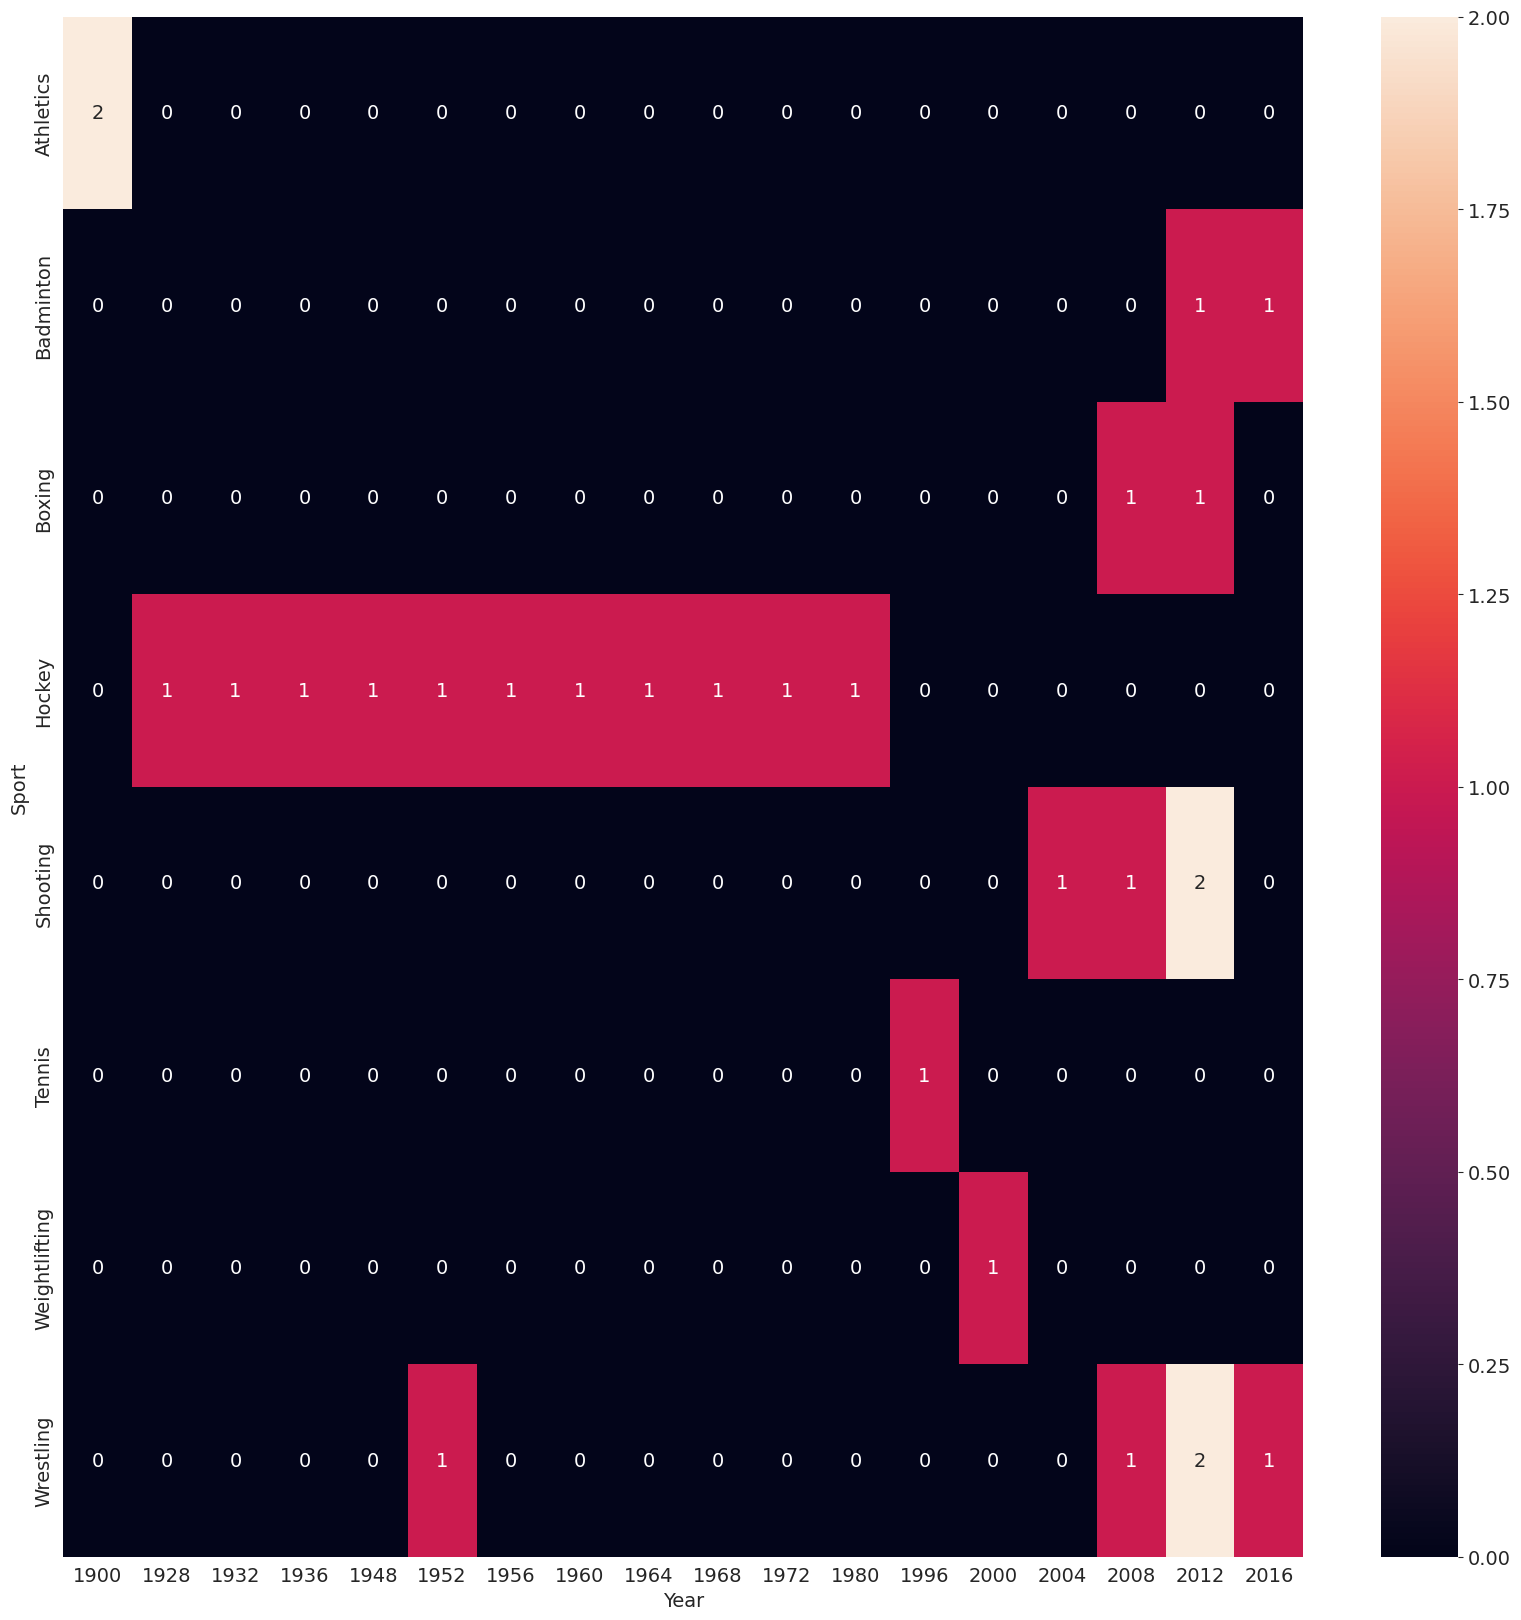

In [38]:
ind = temp[temp.region=='India']
ind.pivot_table(index = 'Sport',columns = 'Year',values= 'Medal',aggfunc='count').fillna(0)
plt.figure(figsize  = (20,20))
sns.heatmap(ind.pivot_table(index = 'Sport',columns = 'Year',values= 'Medal',aggfunc='count').fillna(0),annot = True)
plt.show()

#####  Box Plot of Athlete Ages by Medal


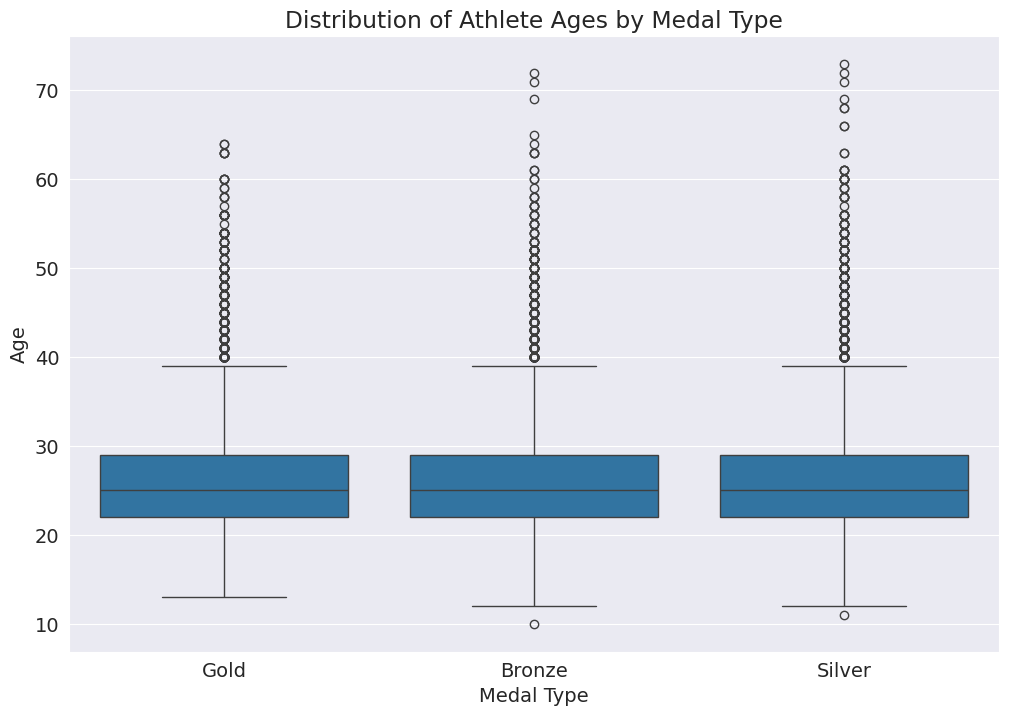

In [39]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Medal', y='Age', data=df)
plt.title('Distribution of Athlete Ages by Medal Type')
plt.xlabel('Medal Type')
plt.ylabel('Age')
plt.show()

## Asking and Answering Questions

**By asking and answering questions using the Olympics dataset, we can derive valuable insights into the historical trends and achievements of athletes and nations in the Games. Questions such as the most successful country in terms of medals, the age distribution of athletes over time, and the dominance of certain sports can provide a comprehensive view of the Olympics' evolution.**



#### Q1: No.of.Editions, Cities, Events/sports, Athelets, Participating Nations

In [40]:
print("Number of Editions Happened ",df['Year'].unique().shape[0]-1)

Number of Editions Happened  28


Number of Cities, and Name of Cities that handled Events

In [41]:
print("Number of Cities :",df['City'].nunique())
print("Name of Cities that handled Events :")
print(df['City'].unique())

Number of Cities : 23
Name of Cities that handled Events :
['Barcelona' 'London' 'Antwerpen' 'Paris' 'Los Angeles' 'Helsinki'
 'Sydney' 'Atlanta' 'Stockholm' 'Beijing' 'Rio de Janeiro' 'Athina'
 'Mexico City' 'Munich' 'Seoul' 'Berlin' 'Melbourne' 'Roma' 'Amsterdam'
 'Montreal' 'Moskva' 'Tokyo' 'St. Louis']


In [42]:
print("Number of Sports: ",df['Sport'].nunique())
print("What are the sports: ",df['Sport'].unique())

Number of Sports:  52
What are the sports:  ['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics']


In [43]:
print("Number of Events held: ",df['Event'].nunique())

Number of Events held:  651


In [44]:
print("Number of regions Event held: ",df['region'].nunique())
print("Where are the events handled: ", df['region'].unique())

Number of regions Event held:  205
Where are the events handled:  ['China' 'Denmark' 'Netherlands' 'Finland' 'Norway' 'Romania' 'Estonia'
 'France' 'Morocco' 'Spain' 'Egypt' 'Iran' 'Bulgaria' 'Italy' 'Chad'
 'Azerbaijan' 'Sudan' 'Russia' 'Argentina' 'Cuba' 'Belarus' 'Greece'
 'Cameroon' 'Turkey' 'Chile' 'Mexico' 'USA' 'Nicaragua' 'Hungary'
 'Nigeria' 'Algeria' 'Kuwait' 'Bahrain' 'Pakistan' 'Iraq' 'Syria'
 'Lebanon' 'Qatar' 'Malaysia' 'Germany' 'Canada' 'Ireland' 'Australia'
 'South Africa' 'Eritrea' 'Tanzania' 'Jordan' 'Tunisia' 'Libya' 'Belgium'
 'Djibouti' 'Palestine' 'Comoros' 'Kazakhstan' 'Brunei' 'India'
 'Saudi Arabia' 'Maldives' 'Ethiopia' 'United Arab Emirates' 'Yemen'
 'Indonesia' 'Philippines' nan 'Uzbekistan' 'Kyrgyzstan' 'Tajikistan'
 'Japan' 'Republic of Congo' 'Switzerland' 'Brazil' 'Monaco' 'Israel'
 'Uruguay' 'Sweden' 'Sri Lanka' 'Armenia' 'Ivory Coast' 'Kenya' 'Benin'
 'UK' 'Ghana' 'Somalia' 'Niger' 'Mali' 'Afghanistan' 'Poland' 'Costa Rica'
 'Panama' 'Georgia' 'Sloven

#### Q2: Top 5 Most Successful Athelets in the Entire World  and their Sport and Top 5 Most Successful Athelets of India and their Sport

In [45]:
# df.loc[df['Medal'].value_counts().sort_values(ascending = False),['Name','Sport']]
top = pd.DataFrame(df.loc[df['Medal'].isnull()==False].groupby(by = ['Name','Sport'])['Medal'].value_counts().sort_values(ascending = False))
top5indians = pd.DataFrame(df[df['region']=='India'].groupby(by = ['Name','Sport'])['Medal'].count().sort_values(ascending = False))
print(top.head())
print(top5indians)

                                                count
Name                           Sport     Medal       
Michael Fred Phelps, II        Swimming  Gold      23
Raymond Clarence "Ray" Ewry    Athletics Gold      10
Mark Andrew Spitz              Swimming  Gold       9
Paavo Johannes Nurmi           Athletics Gold       9
Frederick Carlton "Carl" Lewis Athletics Gold       9
                                            Medal
Name                             Sport           
Udham Singh Kular                Hockey         4
Leslie Walter Claudius           Hockey         4
Harbinder Singh Chimni           Hockey         3
Balbir Singh                     Hockey         3
Balbir Singh Dosanjh, Sr.        Hockey         3
...                                           ...
Jaspal Rana                      Shooting       0
Jata Shankar                     Athletics      0
Javur Jagdishappa "J. J." Shobha Athletics      0
Jayanta Talukdar                 Archery        0
Zora Singh            

#### Q3: Country wise top 10 Athelets

In [46]:
top_athletes_by_country = df.groupby(['region', 'Name'])['Medal'].count().sort_values(ascending=False).reset_index()

for country in top_athletes_by_country['region'].unique():
    top_10 = top_athletes_by_country[top_athletes_by_country['region'] == country].head(10)
    print(f"Top 10 Athletes for {country}:")
    print(top_10)
    print("\n")

Top 10 Athletes for USA:
   region                                             Name  Medal
0     USA                          Michael Fred Phelps, II     28
6     USA             Dara Grace Torres (-Hoffman, -Minas)     12
8     USA                               Ryan Steven Lochte     12
9     USA  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     12
10    USA                    Natalie Anne Coughlin (-Hall)     12
16    USA                             Carl Townsend Osburn     11
17    USA                                Mark Andrew Spitz     11
18    USA                   Matthew Nicholas "Matt" Biondi     11
19    USA                             Gary Wayne Hall, Jr.     10
24    USA                      Raymond Clarence "Ray" Ewry     10


Top 10 Athletes for Russia:
    region                                      Name  Medal
1   Russia        Larysa Semenivna Latynina (Diriy-)     18
2   Russia              Nikolay Yefimovich Andrianov     15
4   Russia               Borys Anfiyano

#### Q4: Top 5 Countries Performed Best So far in the Olympics

In [47]:
bestper = pd.DataFrame(df.groupby(['region'])['Total'].sum().sort_values(ascending = False).reset_index())
bestper.head()

,region,Total
0,USA,5002
1,Russia,3188
2,Germany,3126
3,UK,1984
4,France,1617


#### Q5: What is the No.of Male and Female Participants participated over the Years, Draw Line Plot Comparing Between Them

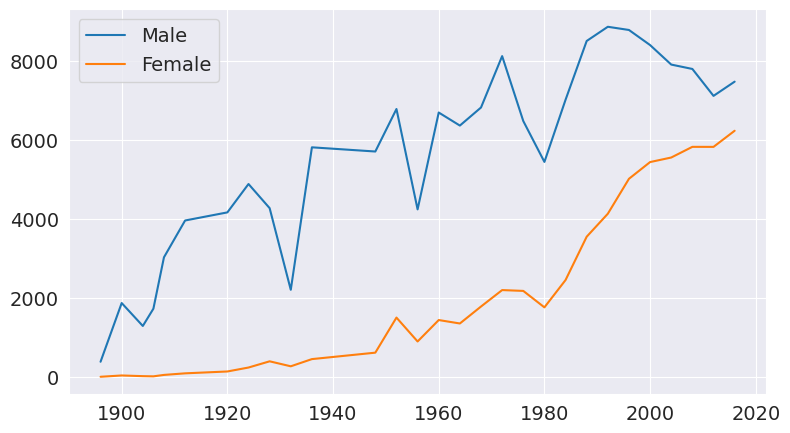

In [48]:
men = df[df['Sex']=='M'].groupby('Year')['Name'].count().reset_index()
women = df[df['Sex']=='F'].groupby('Year')['Name'].count().reset_index()
fi = men.merge(women,how = 'left',on= 'Year').fillna(0)
fi.rename(columns = {'Name_x':'Male','Name_y':'Female'},inplace = True)
plt.plot(fi['Year'],fi['Male'])
plt.plot(fi['Year'],fi['Female'])
plt.legend(fi.columns[1:])
plt.show()

#### Q6:Calculate the average age of each sport

In [49]:
age_trend = df.groupby(['Sport', 'Year', 'Medal'])['Age'].mean().round().reset_index()

selected_sports = ['Athletics', 'Swimming', 'Gymnastics', 'Basketball']
filtered_age_trend = age_trend[age_trend['Sport'].isin(selected_sports)]
filtered_age_trend

,Sport,Year,Medal,Age
71,Athletics,1896,Bronze,23.0
72,Athletics,1896,Gold,22.0
73,Athletics,1896,Silver,22.0
74,Athletics,1900,Bronze,23.0
75,Athletics,1900,Gold,24.0
...,...,...,...,...
1547,Swimming,2012,Gold,23.0
1548,Swimming,2012,Silver,24.0
1549,Swimming,2016,Bronze,23.0
1550,Swimming,2016,Gold,23.0


#### Q7: Select a few popular sports for visualization

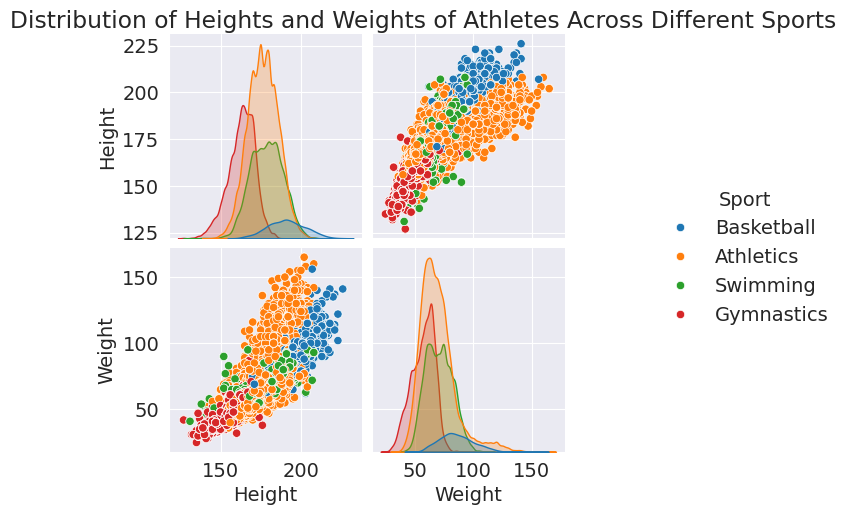

In [50]:
selected_sports = ['Athletics', 'Swimming', 'Gymnastics', 'Basketball']
filtered_df = df[df['Sport'].isin(selected_sports)]

sns.pairplot(filtered_df, vars=['Height', 'Weight'], hue='Sport', kind='scatter', diag_kind='kde')
plt.suptitle('Distribution of Heights and Weights of Athletes Across Different Sports', y=1.02)
plt.show()

#### Q8: Number of Female Athletes Participating in the Olympics Over Time

In [51]:
female_participation = df[df['Sex'] == 'F'].groupby('Year')['Name'].count().reset_index()
female_participation

,Year,Name
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,234
7,1928,391
8,1932,265
9,1936,447


#### Q9: Calculate BMI

In [52]:
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)
# Note: BMI = weight (kg) / height (m)^2

average_bmi = df.groupby('Sport')['BMI'].mean().sort_values(ascending=False).reset_index()
average_bmi

,Sport,BMI
0,Weightlifting,27.723679
1,Tug-Of-War,27.467685
2,Art Competitions,26.222816
3,Rugby,25.684543
4,Baseball,25.676955
5,Judo,25.588986
6,Rugby Sevens,25.456048
7,Wrestling,25.001819
8,Water Polo,24.586849
9,Shooting,24.465527


## Inferences and Conclusion

**Through this comprehensive analysis and visualization of the last 120 years of Olympic data, we gained valuable insights into the Games' evolution and the performances of athletes and countries. The Olympics have grown into a global sporting event with increasing gender inclusivity and a diverse range of age groups. While certain sports have consistently dominated, there are variations in medal success across different countries, reflecting the impact of cultural, economic, and sporting factors.
We observed that while age can influence athletic performance, factors such as training, determination, and opportunity also contribute significantly to an athlete's success. Some countries have sustained their strong performances over time, while others have experienced fluctuations, emphasizing the need for long-term sports development strategies.
It also offers valuable insights for policymakers, sports organizations, and researchers in shaping future Olympic events and promoting sports excellence on a global scale.**

## References and Future Work
*I have Gained this Dataset from Kaggle.*

**Predictive Modeling:** A potential future project could involve building predictive models to forecast medal counts for future Olympic Games based on historical data. Machine learning algorithms such as regression and time-series analysis could be employed for this purpose.

**Identify Emerging Sports:** Analyze the heatmap of events per sport to pinpoint sports that have shown significant growth in recent years. This could indicate emerging trends and potential areas for future investment and development.

**Investigate Regional Differences:** Explore medal tallies and athlete demographics for different regions of the world. This could reveal how access to resources and opportunities result in oppurtunities, highlighting areas where targeted interventions could promote greater participation and success.

**Study the Impact of Age on Performance:** Further investigate the relationship between age and athletic performance, considering factors such as sport type, gender, and medal category. This could inform training strategies and talent identification programs.

**Analyze the Evolution of Body Composition:** Explore how the height and weight distributions of athletes have changed over time, considering factors such as sport specialization and advancements in training techniques. This could provide insights into the evolving physical demands of different sports.

By delving deeper into these aspects of the dataset, we can gain a more clear understanding of the complex factors that contribute to success in the Olympics.